In [1]:
print('hoda')

hoda


In [3]:
import numpy
import os



In [4]:
import os

real_count = len(os.listdir("dataset/real"))
fake_count = len(os.listdir("dataset/fake"))

print("  Number of Real:", real_count)
print(" Number of Fake:", fake_count)


  Number of Real: 6978
 Number of Fake: 6978


X

In [5]:
#Step 1: Import Libraries
import os
import librosa
import numpy as np

# Paths
real_path = "dataset/real"
fake_path = "dataset/fake"

X = []   # features
y = []   # labels

#Step 2: Preprocessing

# Function to extract MFCC features
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=16000)   # load audio
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)  # extract MFCCs
    mfcc = np.mean(mfcc.T, axis=0)  # take mean across time to reduce size
    return mfcc

# Process real audio (label = 0)
for file in os.listdir(real_path):
    file_path = os.path.join(real_path, file)
    features = extract_features(file_path)
    X.append(features)
    y.append(0)

# Process fake audio (label = 1)
for file in os.listdir(fake_path):
    file_path = os.path.join(fake_path, file)
    features = extract_features(file_path)
    X.append(features)
    y.append(1)

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

print("Shape of X (features):", X.shape)
print("Shape of y (labels):", y.shape)


Shape of X (features): (13956, 20)
Shape of y (labels): (13956,)


In [ ]:
y

In [13]:
np.save("X.npy", X)
np.save("y.npy", y)


In [15]:
from sklearn.model_selection import train_test_split

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)


Training set size: (11164, 20) (11164,)
Testing set size: (2792, 20) (2792,)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train a simple Logistic Regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7987106017191977

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79      1396
           1       0.79      0.82      0.80      1396

    accuracy                           0.80      2792
   macro avg       0.80      0.80      0.80      2792
weighted avg       0.80      0.80      0.80      2792



In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout

# Reshape for CNN (samples, timesteps, features)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn  = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build CNN model
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # binary classification (real=0, fake=1)
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



Matplotlib is building the font cache; this may take a moment.


Epoch 1/10


/opt/miniconda3/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6339 - loss: 0.8688 - val_accuracy: 0.7711 - val_loss: 0.5015
Epoch 2/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7452 - loss: 0.5137 - val_accuracy: 0.8012 - val_loss: 0.4293
Epoch 3/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7866 - loss: 0.4514 - val_accuracy: 0.8446 - val_loss: 0.3818
Epoch 4/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8127 - loss: 0.4141 - val_accuracy: 0.8671 - val_loss: 0.3331
Epoch 5/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8314 - loss: 0.3775 - val_accuracy: 0.8951 - val_loss: 0.2795
Epoch 6/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8437 - loss: 0.3524 - val_accuracy: 0.9083 - val_loss: 0.2552
Epoch 7/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8561 - loss: 0.3309 - val_accuracy: 0.9269 - val_loss: 0.2212
Epoch 8/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8700 - loss: 0.3107 - val_accuracy: 0.9212 - val_

In [ ]:

# Train
history = model.fit(X_train_cnn, y_train, validation_data=(X_test_cnn, y_test),
                    epochs=10, batch_size=32)

# Evaluate
loss, acc = model.evaluate(X_test_cnn, y_test)
print(f"Test Accuracy: {acc:.2f}")

In [20]:
model.save("deepfake_audio_cnn.h5")
from tensorflow.keras.models import load_model
model = load_model("deepfake_audio_cnn.h5")


88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step


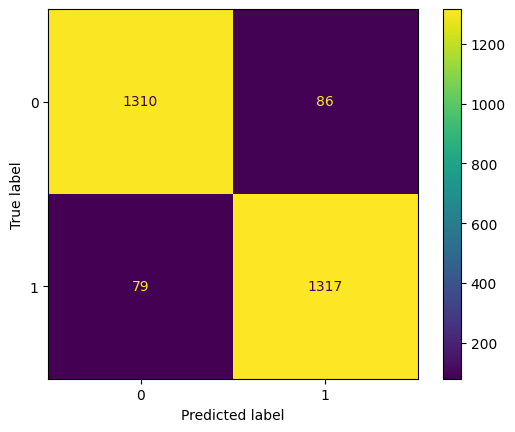

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_classes = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [ ]:
#Make an inference function (audio_path, model.h5) -> real or fake with percentage (0.89)
/Users/hudakhaleel/sentinelai/sentinelai/dataset/fake/file9.mp3.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav

In [ ]:
model.load(path=)

In [ ]:
#Make an inference function (audio_path, model.h5) -> real or fake with percentage (0.89)